In [1]:
import pandas as pd

data = pd.read_csv("Car details v3.csv")
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:

del data['torque']

In [19]:
data['new'] = data['max_power'] ** 2

In [22]:
del data['max_power']

In [4]:
del data['mileage']

In [15]:
del data['engine']

In [5]:
del data['seats']

In [6]:
data['engine'] =  data['engine'].str.extract('(\d+)').astype(float)
data['max_power'] =  data['max_power'].str.extract('(\d+)').astype(float)

In [16]:
data.head()

,year,selling_price,km_driven,seller_type,transmission,owner,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,...,name_Mitsubishi,name_Nissan,name_Opel,name_Peugeot,name_Renault,name_Skoda,name_Tata,name_Toyota,name_Volkswagen,name_Volvo
0,2014,450000,145500,0,0,3,74.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2014,370000,120000,0,0,2,103.0,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2,2006,158000,140000,0,0,1,78.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,2010,225000,127000,0,0,3,90.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2007,130000,120000,0,0,3,88.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [7]:
data['name'] =  data['name'].apply(lambda x: x.split()[0])

In [9]:
data = data.replace(to_replace=['Automatic', 'Manual',], value=[1, 0])

data = data.replace(to_replace=['Trustmark Dealer', 'Dealer', 'Individual'], value=[2, 1, 0])
data = data.replace(to_replace=['Test Drive Car', 'First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner'], value=[4, 3, 2, 1, 0])

In [10]:
data = pd.get_dummies(data, columns=['fuel'], drop_first=True)

In [11]:
data = pd.get_dummies(data, columns=['name'], drop_first=True)

In [12]:
data = data.fillna(data.mean ())

In [68]:
X_full = data.drop('selling_price', axis=1)
y_full = data['selling_price']

In [69]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_full, y_full, test_size=0.2, random_state=111)

model = LinearRegression()
model.fit(Xtrain, ytrain)
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)
print(mean_squared_error(pred_test, ytest) ** 0.5, mean_squared_error(pred_train, ytrain) ** 0.5)

301676.9767358052 308340.54382145277


<Axes: >

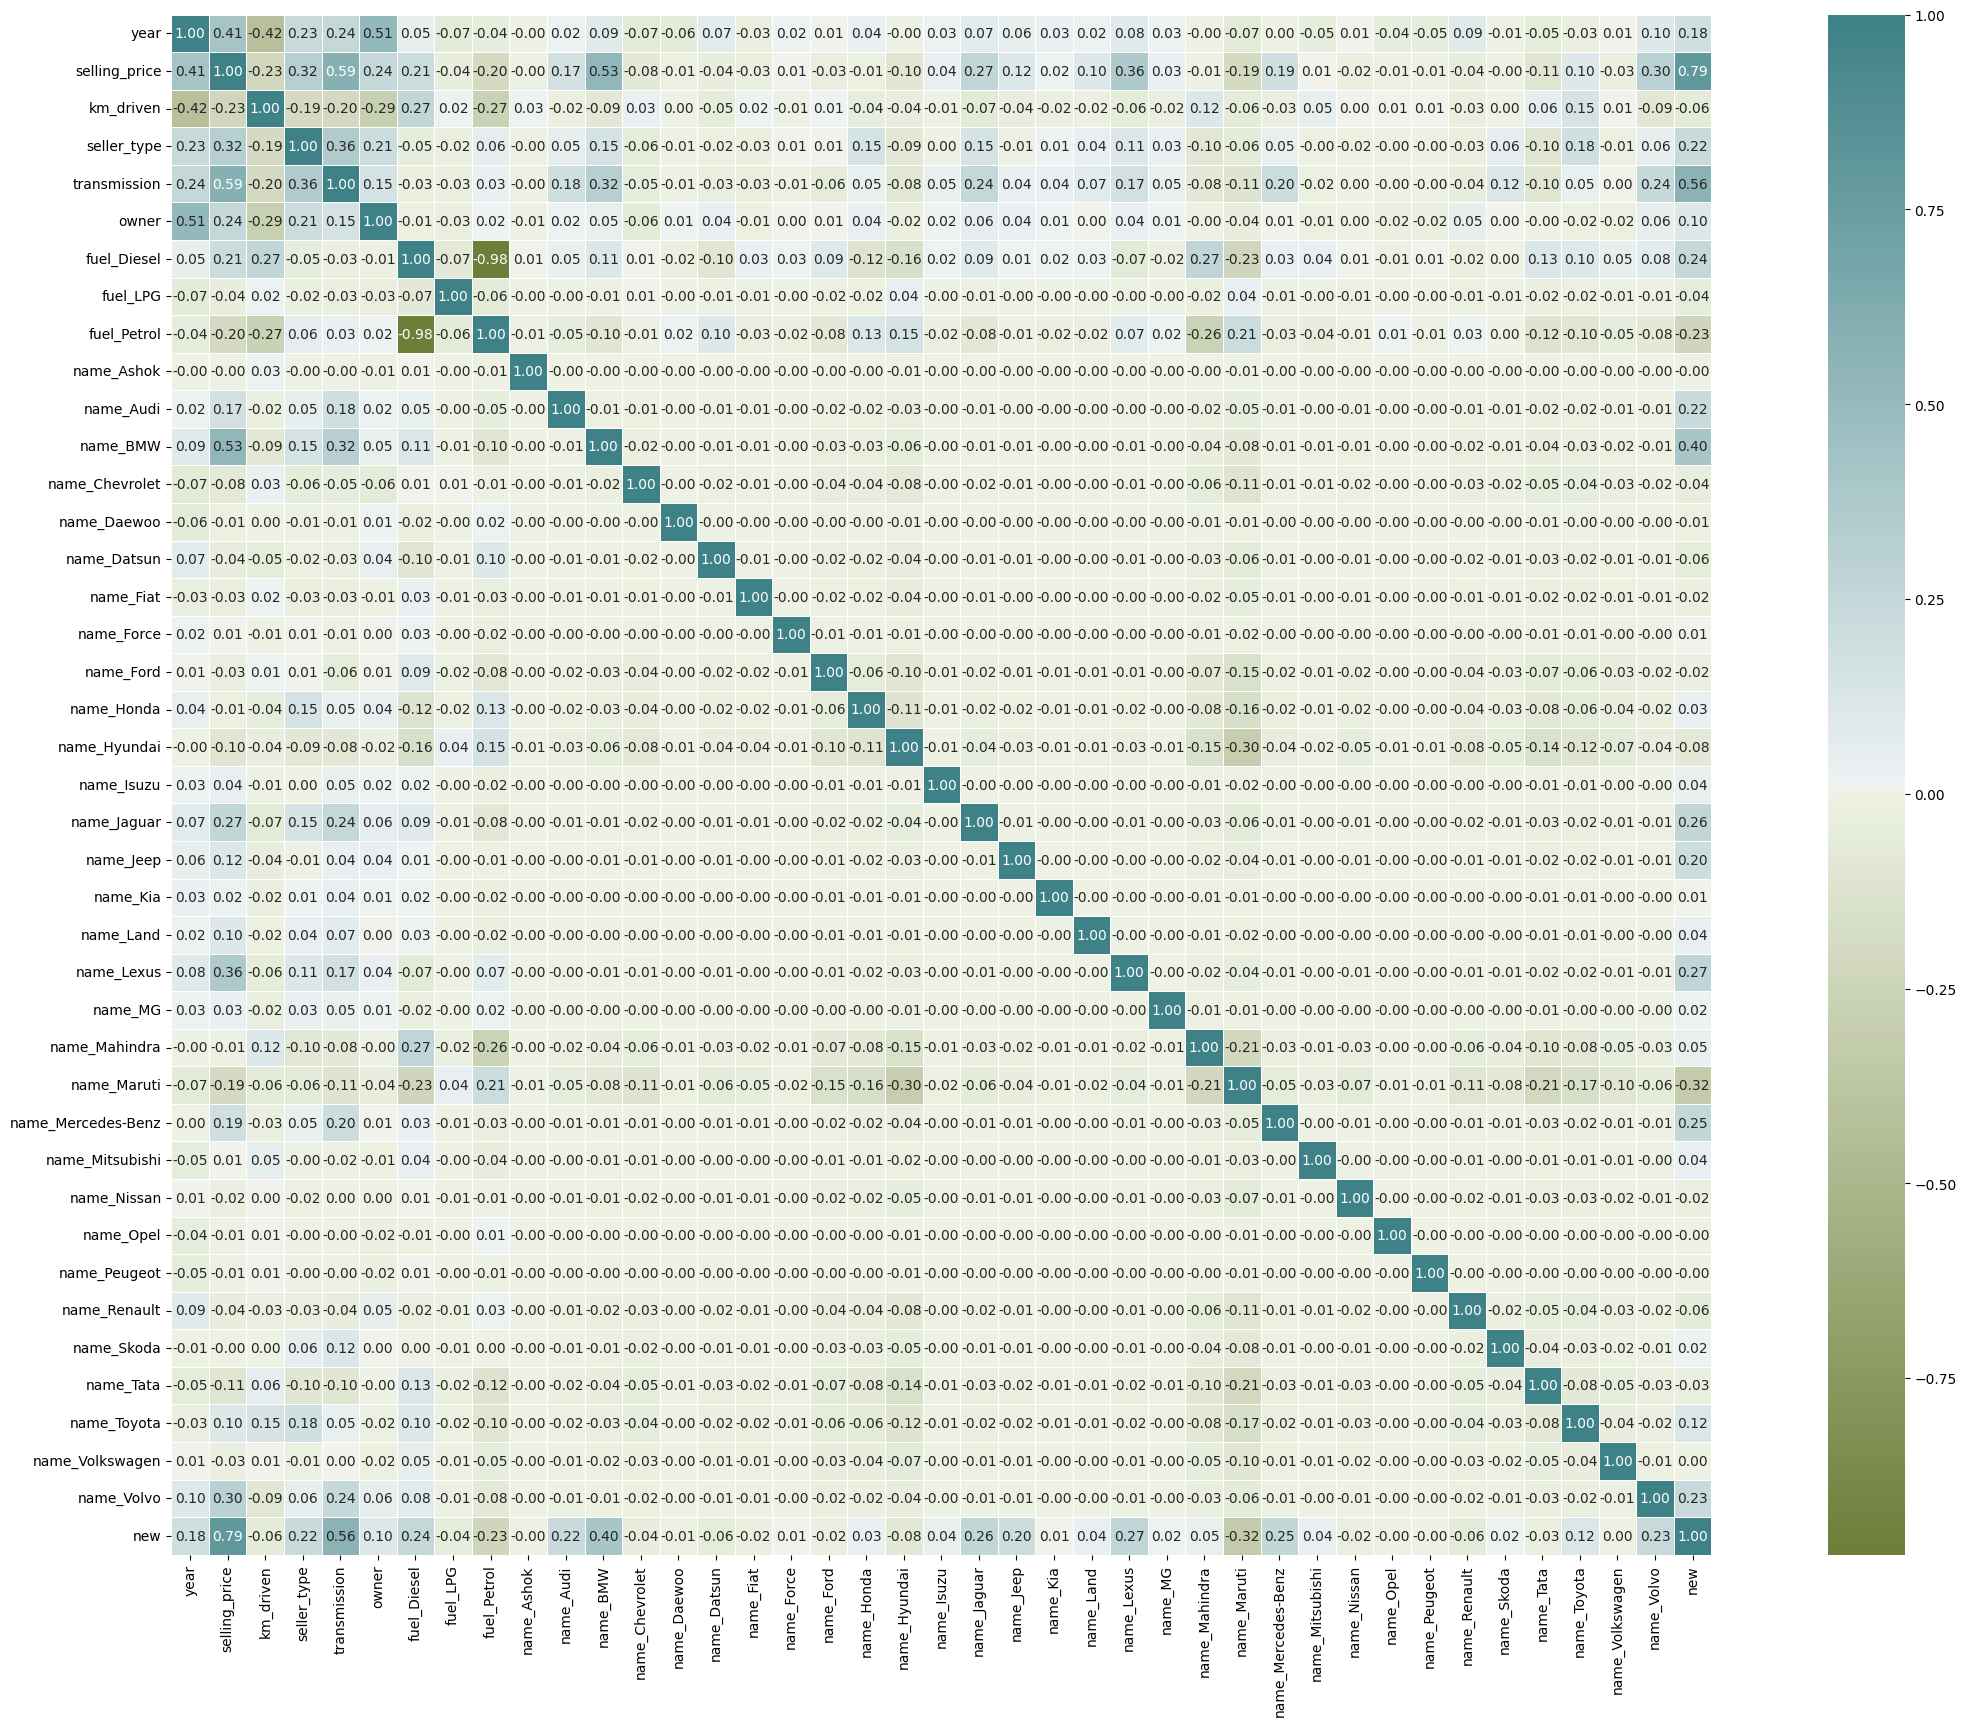

In [62]:
import seaborn as sns
import numpy as np
import matplotlib as plt


plt.pyplot.figure(figsize=(30,20))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)